# SetUp

Data Source: https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp

## Imports

In [1]:
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.graph_objs import *

# to avoid warnings 
import warnings
warnings.filterwarnings("ignore")

# wordcloud
from wordcloud import WordCloud

# text processing
import nltk
from nltk.corpus import stopwords

# hugging face transformers for sentiment analysis
from transformers import pipeline

import chart_studio
import chart_studio.plotly as py

## Notebook Configs

In [2]:
set_stop_words = set(stopwords.words("english"))
sentiment_analysis_pipeline = pipeline("sentiment-analysis")

username='royn5618'
api_key='Q3AuLxavQvaoBHPy5RgR'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

## Data Imports

In [3]:
train_data = pd.read_csv('Data/train.txt', sep=';', names=['text', 'emotion'])
train_data.head()

text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

In [4]:
test_data = pd.read_csv('Data/test.txt', sep=';', names=['text', 'emotion'])
test_data.head()

text  emotion
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadness
3  i left with my bouquet of red and yellow tulip...      joy
4    i was feeling a little vain when i did this one  sadness

# Basic EDA

## How much data?

In [5]:
len(train_data), len(test_data)

(16000, 2000)

## Missing Values

In [6]:
if not train_data.isna().sum().any() and not test_data.isna().sum().any():
    print("No Null Values detected")
else:
    print("Null Values detected")

No Null Values detected


## Data Distribution by Emotions

In [7]:
emotions_order = list(train_data.emotion.unique())
emotions_order

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

In [8]:
emotions_color = ['blue', 'red', 'pink', 'green', 'grey', 'yellow']

In [9]:
dict_emo_color = {}
for each_emo, each_color in zip(emotions_order, emotions_color):
    dict_emo_color[each_emo] = each_color
    
dict_emo_color

{'sadness': 'blue',
 'anger': 'red',
 'love': 'pink',
 'surprise': 'green',
 'fear': 'grey',
 'joy': 'yellow'}

In [10]:
fig = px.histogram(train_data,
                   x="emotion",
                   template='plotly_white',
                   color='emotion',
                   category_orders = {'emotion': emotions_order}
                  )
fig.update_layout(
    title={
        'text': "Row Count of <b>Train Data</b> by Emotion Tags",
        'x' : 0.5,
        'xanchor': 'center'
    })
fig.update_yaxes(title='Number of Rows').update_xaxes(title='Emotions')
fig.show()

In [11]:
# py.plot(fig, filename="Row Count by Emotion Tags Train", auto_open = True)

In [12]:
fig = px.histogram(test_data,
                   x="emotion",
                   template='plotly_white',
                   color='emotion',
                   category_orders={'emotion': emotions_order})
fig.update_layout(
    title={
        'text': "Row Count of <b>Test Data</b> by Emotion Tags",
        'x': 0.5,
        'xanchor': 'center'
    })
fig.update_yaxes(title='Number of Rows').update_xaxes(title='Emotions')
fig.show()

In [13]:
# py.plot(fig, filename="Row Count by Emotion Tags Test", auto_open = True)

## Wordcloud for Most Frequently Occuring Words

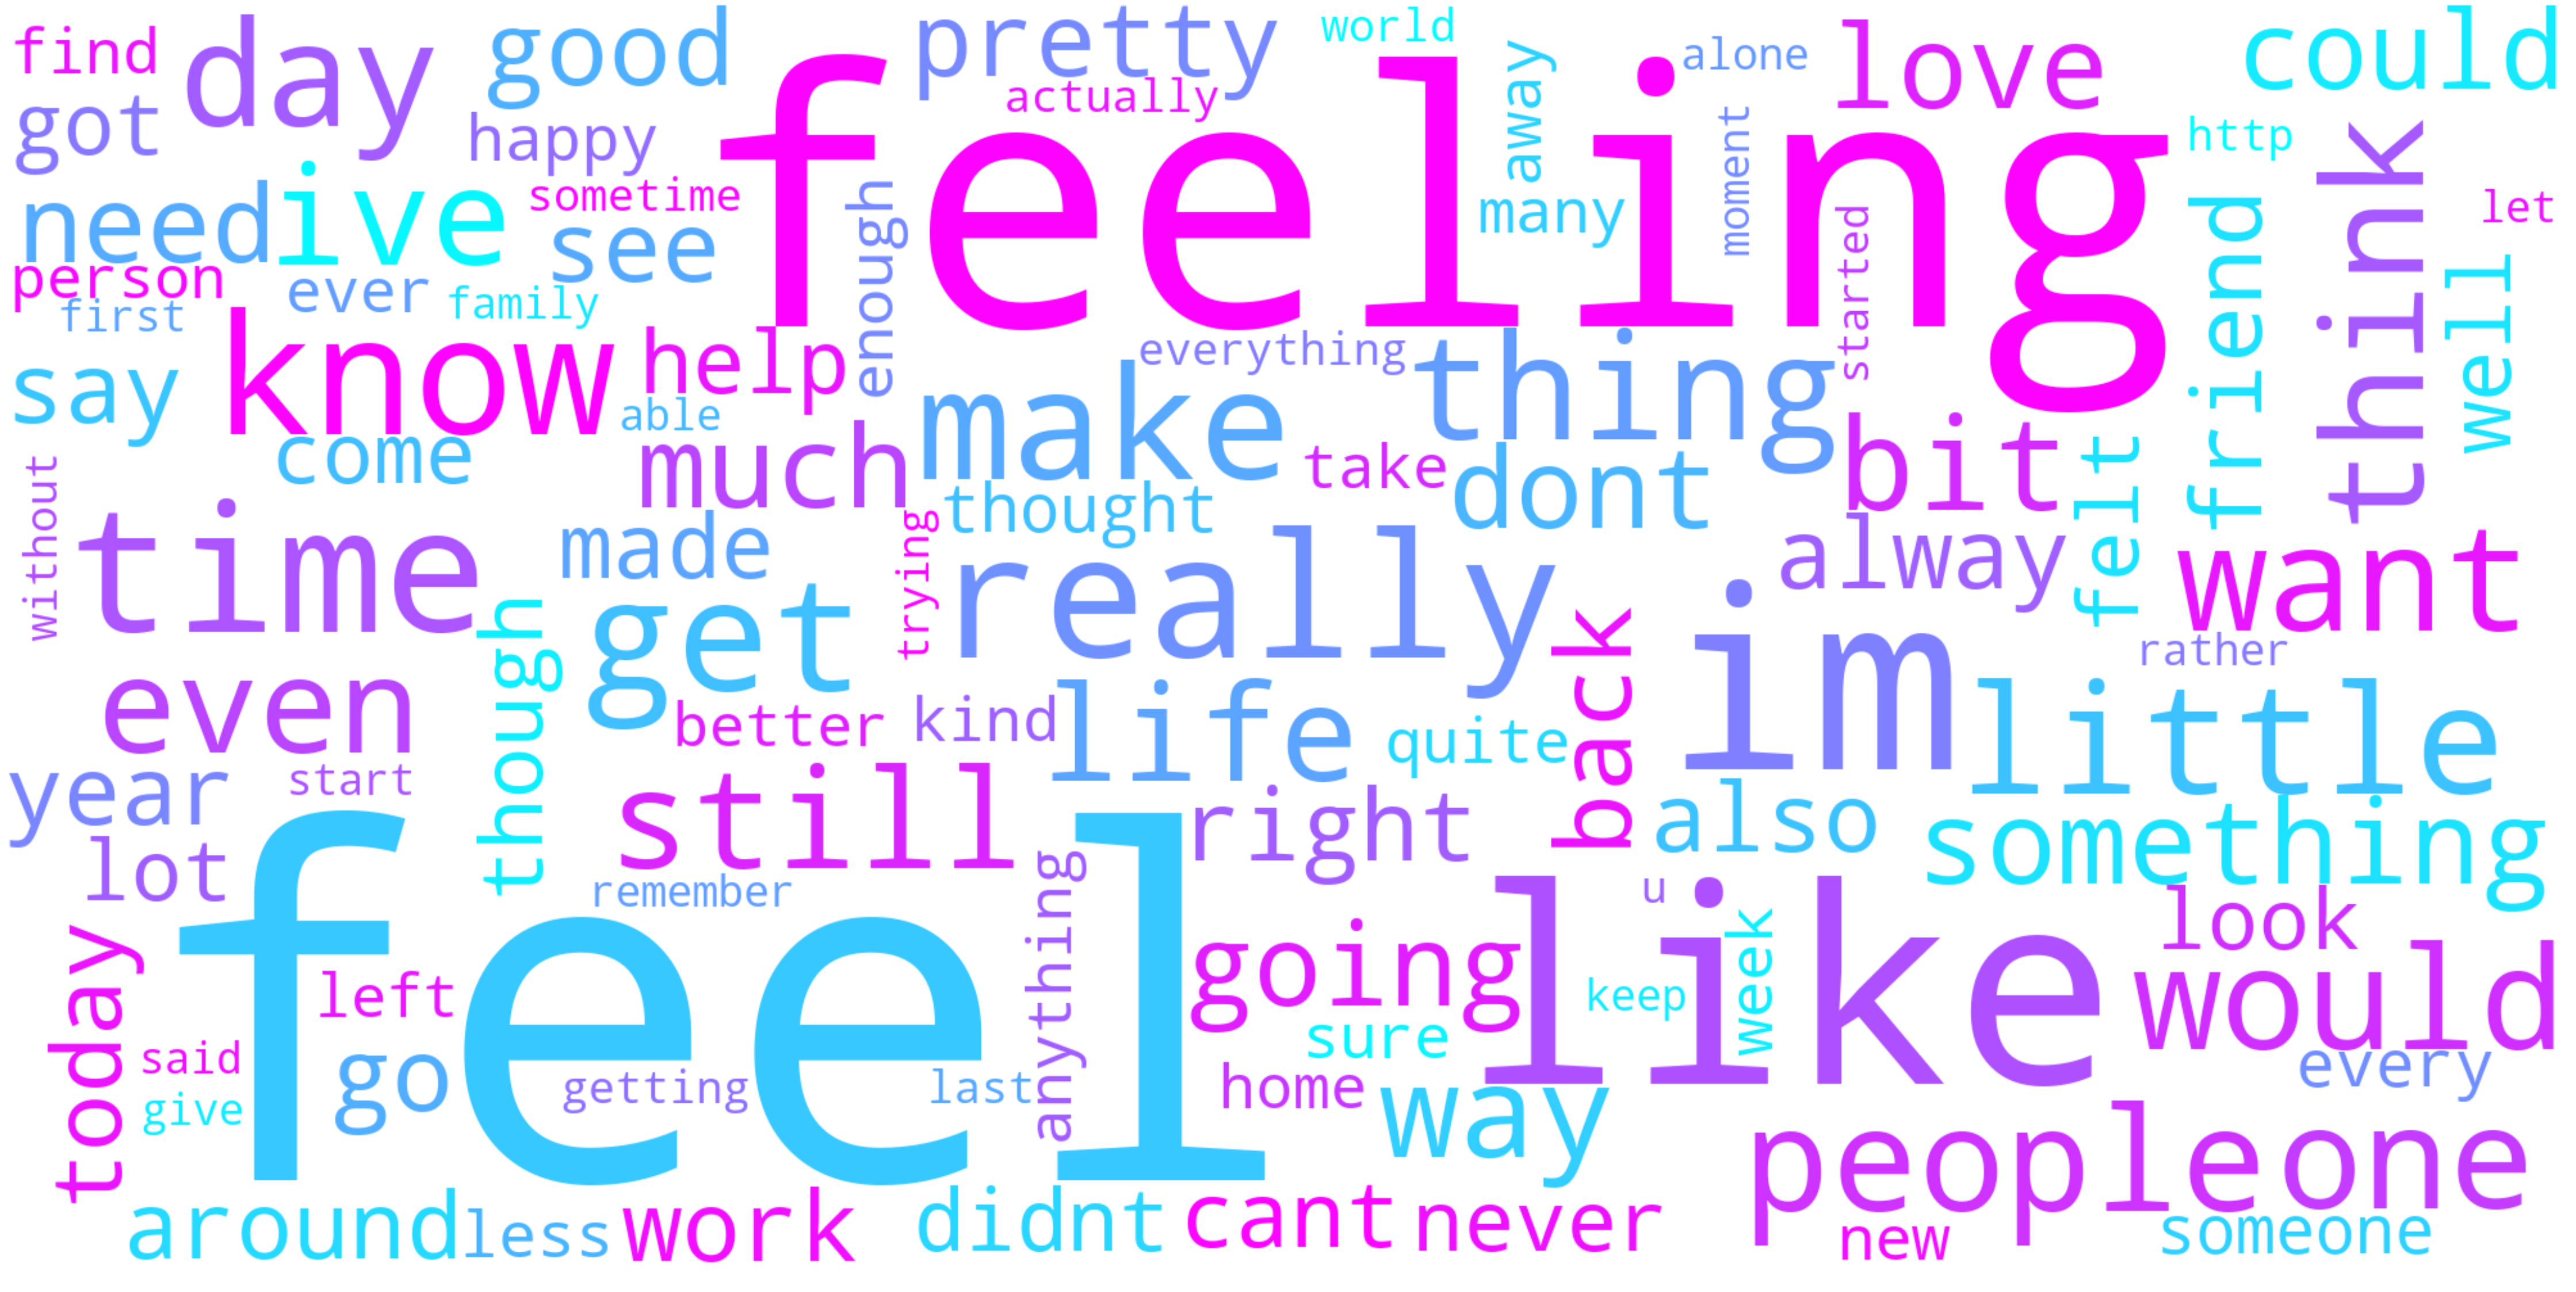

In [14]:
wordcloud = WordCloud(width=2000,
                      height=1000,
                      max_words=100,
                      normalize_plurals=True,
                      font_step=1,
                      relative_scaling=0.5,
                      collocations=False,
                      stopwords = set_stop_words,
                      background_color="white",
                      colormap='cool',
                      include_numbers=False).generate(" ".join(list(train_data.text)))

plt.figure(figsize = (80, 50), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

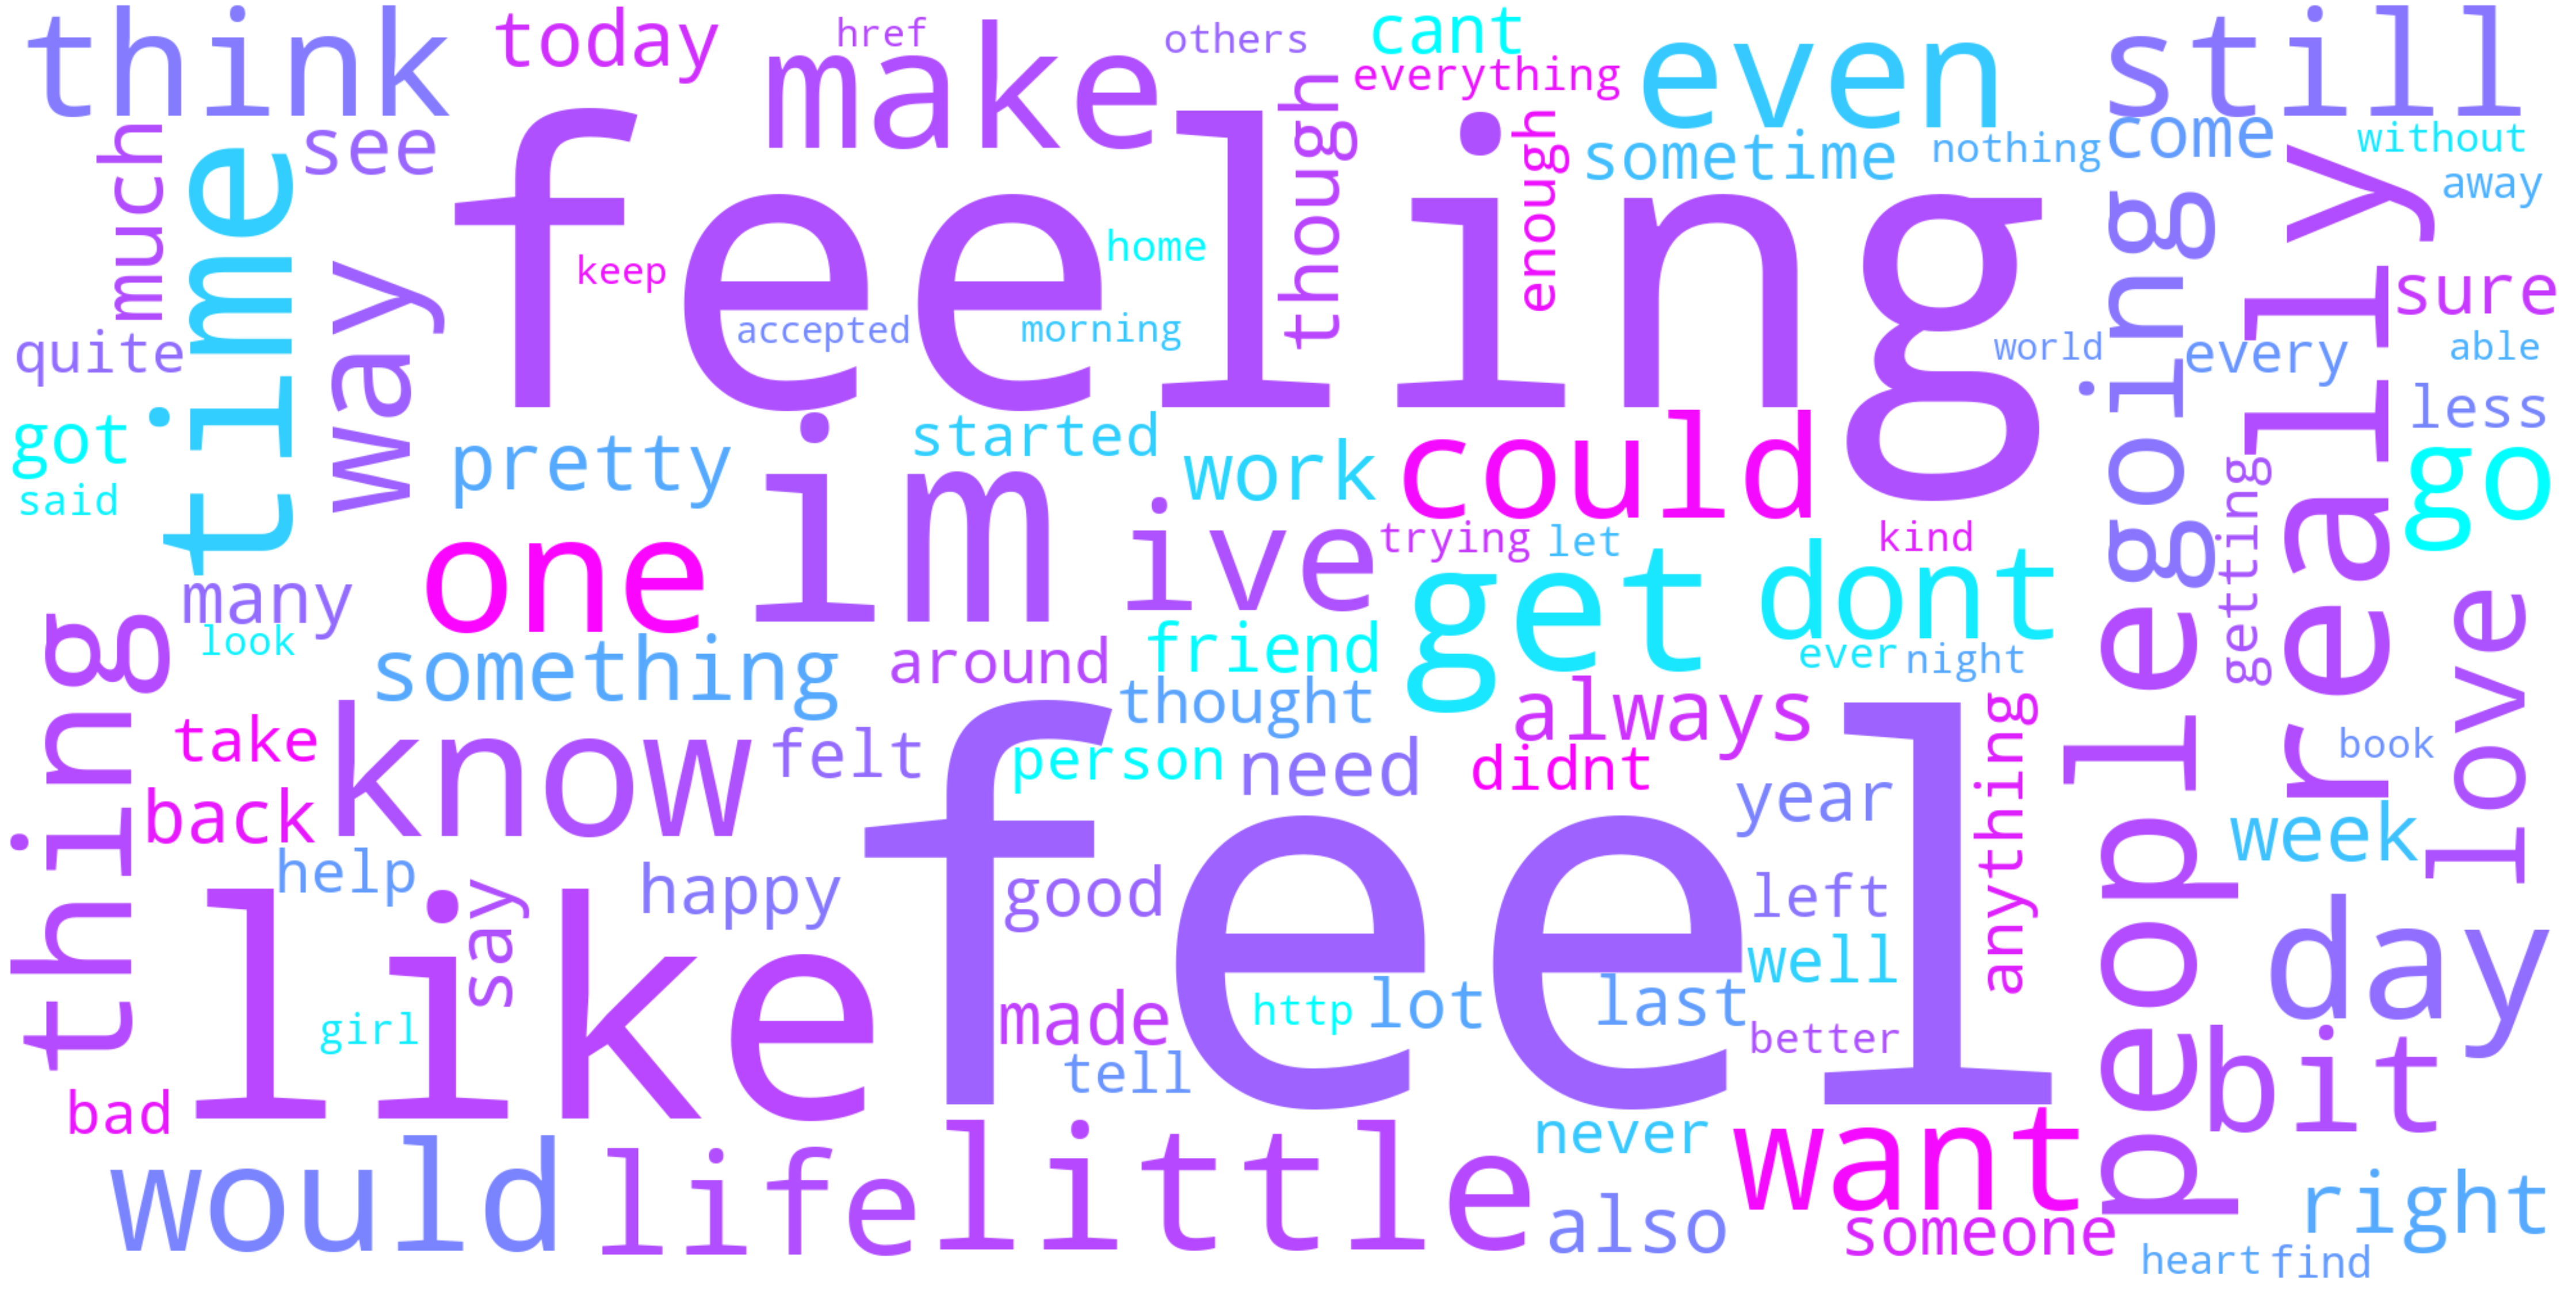

In [15]:
wordcloud = WordCloud(width=2000,
                      height=1000,
                      max_words=100,
                      normalize_plurals=True,
                      font_step=1,
                      relative_scaling=0.5,
                      collocations=False,
                      stopwords = set_stop_words,
                      background_color="white",
                      colormap='cool',
                      include_numbers=False).generate(" ".join(list(test_data.text)))

plt.figure(figsize = (80, 50), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [16]:
def generate_wordcloud(emotion, colormap, text_data): 
    wordcloud = WordCloud(width=500,
                          height=300,
                          max_words=100,
                          normalize_plurals=True,
                          font_step=1,
                          relative_scaling=0.5,
                          collocations=False,
                          stopwords = set_stop_words,
                          background_color="white",
                          colormap=colormap,
                          include_numbers=False).generate(" ".join(list(text_data.text)))
    plt.title('Emotion: ' + emotion)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

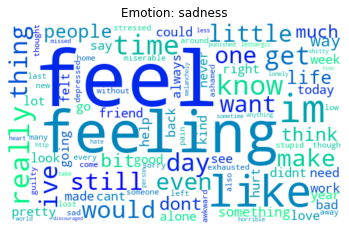

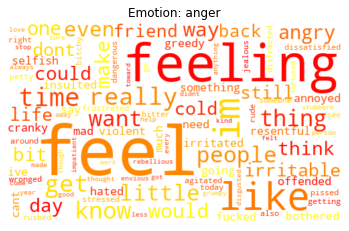

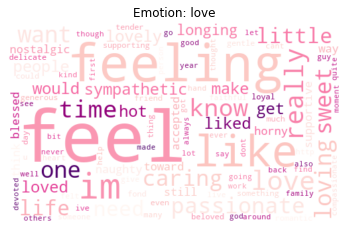

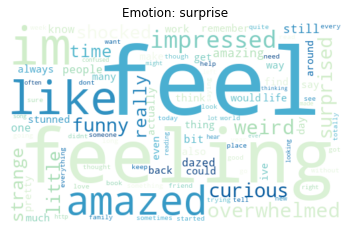

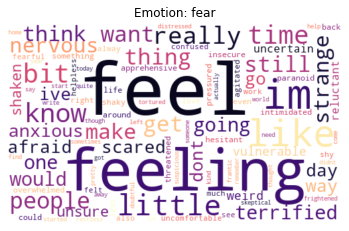

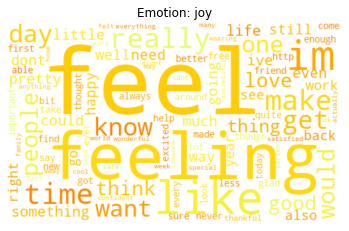

In [17]:
colormaps = {
    'sadness' : 'winter',
    'anger' : 'autumn',
    'love' : 'RdPu',
    'surprise' : 'GnBu',
    'fear' : 'magma',
    'joy' : 'Wistia'
}

for each_cat in train_data.emotion.unique():
    generate_wordcloud(each_cat, colormaps[each_cat], train_data[train_data['emotion'] == each_cat])

##  Text Length Analysis

In [18]:
train_data['length_text'] = train_data.text.apply(len)
test_data['length_text'] = test_data.text.apply(len)

In [19]:
fig = px.box(train_data,
             x='emotion',
             y='length_text',
             color='emotion',
             category_orders={'emotion': emotions_order})
fig.update_yaxes(title='Text Length').update_xaxes(title='Emotions')
fig.show()

In [20]:
# py.plot(fig, filename="Text Length Analysis of Train Data", auto_open = True)

In [21]:
fig = px.box(test_data,
             x='emotion',
             y='length_text',
             color='emotion',
             category_orders={'emotion': emotions_order})
fig.update_yaxes(title='Text Length').update_xaxes(title='Emotions')
fig.show()

In [22]:
# py.plot(fig, filename="Text Length Analysis of Test Data", auto_open = True)

## Data Distribution per Emotion by Sentiment

In [ ]:
train_data['sentiment_hf'] = train_data.text.apply(sentiment_analysis_pipeline)
test_data['sentiment_hf'] = test_data.text.apply(sentiment_analysis_pipeline)

In [ ]:
train_data.head()

In [ ]:
train_data['sentiment_hf'] = train_data['sentiment_hf'].apply(lambda x : x[0]['label'])
test_data['sentiment_hf'] = test_data['sentiment_hf'].apply(lambda x : x[0]['label'])

In [ ]:
fig = px.histogram(train_data,
             x="emotion",
             template='plotly_white',
             color='sentiment_hf',
             category_orders={'emotion': emotions_order})
fig.update_layout(
    title={
        'text': "<b>Train Data</b> Distribution <b>per Emotion by Sentiment</b>",
        'x': 0.5,
        'xanchor': 'center'
    })
fig.update_yaxes(title='Number of Rows').update_xaxes(title='Emotions')
fig.show()

In [ ]:
# py.plot(fig, filename="Train Data Distribution per Emotion by Sentiment", auto_open = True)

In [ ]:
fig = px.histogram(test_data,
             x="emotion",
             template='plotly_white',
             color='sentiment_hf',
             category_orders={'emotion': emotions_order})
fig.update_layout(
    title={
        'text': "<b>Test Data</b> Distribution <b>per Emotion by Sentiment</b>",
        'x': 0.5,
        'xanchor': 'center'
    })
fig.update_yaxes(title='Number of Rows').update_xaxes(title='Emotions')
fig.show()

In [ ]:
# py.plot(fig, filename="Test Data Distribution per Emotion by Sentiment", auto_open = True)

Continued on EmotionClassifier.ipynb